# ANALYSING PATIENTS ADMISSION AND READMISSION

In [219]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [220]:
dataset= pd.read_csv('diabetic_data.csv')

In [221]:
dataset

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [222]:
dataset.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [223]:
dataset.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [224]:
dataset.shape

(101766, 50)

In [225]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [226]:
dataset.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [227]:
dataset.replace('?', pd.NA, inplace=True)

In [228]:
dataset.isna().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [229]:
dataset.nunique()

encounter_id                101766
patient_nbr                  71518
race                             5
gender                           3
age                             10
weight                           9
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      17
medical_specialty               72
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         716
diag_2                         748
diag_3                         789
number_diagnoses                16
max_glu_serum                    4
A1Cresult                        4
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

In [230]:
dataset.medical_specialty.unique()

array(['Pediatrics-Endocrinology', <NA>, 'InternalMedicine',
       'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
       'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Hematology/Oncology', 'Otolaryngology',
       'Surgery-Colon&Rectal', 'Pediatrics-CriticalCare', 'Endocrinology',
       'Urology', 'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Psychology', 'Podiatry',
       'Gynecology', 'Oncology', 'Pediatrics-Neurology',
       'Surgery-Plastic', 'Surgery-Thoracic',
       'Surgery-PlasticwithinHeadandNeck', 'Ophthalmology',
       'Surgery-Pediatric', 'Pediatrics-EmergencyMedicine',
       'PhysicalMedicineandR

In [231]:
dataset['medical_specialty'].fillna('Others', inplace=True)
dataset['race'].fillna('Others', inplace=True)

In [232]:
dataset.drop(["weight","payer_code","medical_specialty"], inplace=True, axis = 1)

In [233]:
dataset.isna().sum()

encounter_id                   0
patient_nbr                    0
race                           0
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        21
diag_2                       358
diag_3                      1423
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazo

In [234]:
dataset.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [235]:
#TO FIND UNIQUE NO. OF PATEINTS

len(dataset['patient_nbr'].unique())

71518

In [236]:
#TO FIND UNIQUE NO. OF ENCOUNTERS

len(dataset['encounter_id'].unique())

101766

In [237]:
#TO FIND ENCOUNTERS PER PATIENT

len(dataset['encounter_id'].unique())/len(dataset['patient_nbr'].unique())

1.4229424760200229

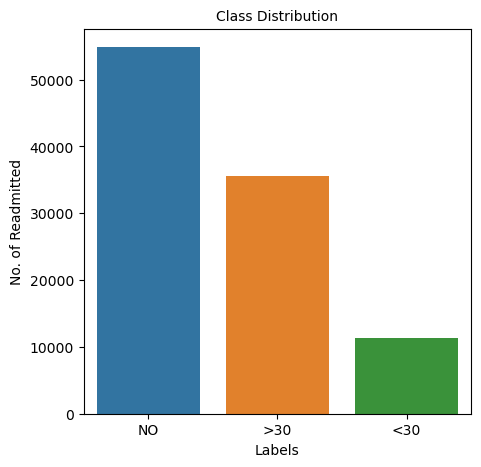

In [238]:
plt.figure(figsize=(5,5))  
sns.barplot(x=dataset['readmitted'].value_counts().index,   y=dataset['readmitted'].value_counts())
plt.xlabel('Labels', size = 10)
plt.ylabel('No. of Readmitted', size = 10)
plt.title('Class Distribution', size = 10)
plt.show()

In [239]:
dataset.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

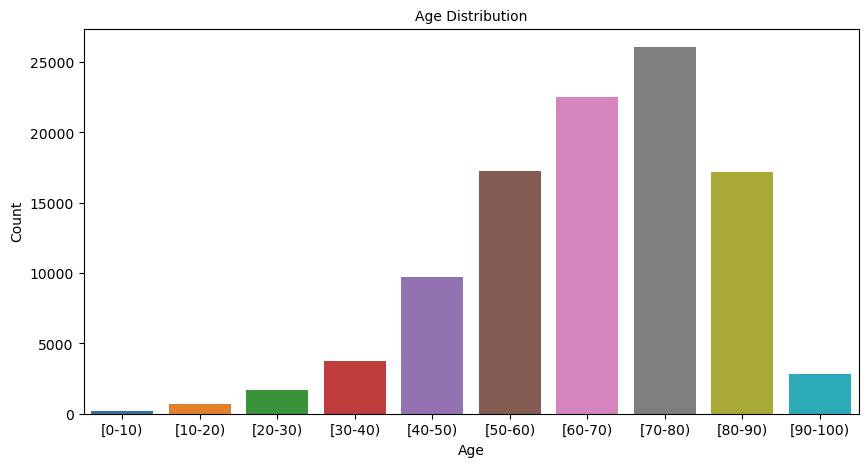

In [240]:
plt.figure(figsize=(10,5)) 
sns.countplot(x='age', data= dataset)
plt.xlabel('Age', size = 10)
plt.ylabel('Count', size = 10)
plt.title('Age Distribution', size = 10)
plt.show()

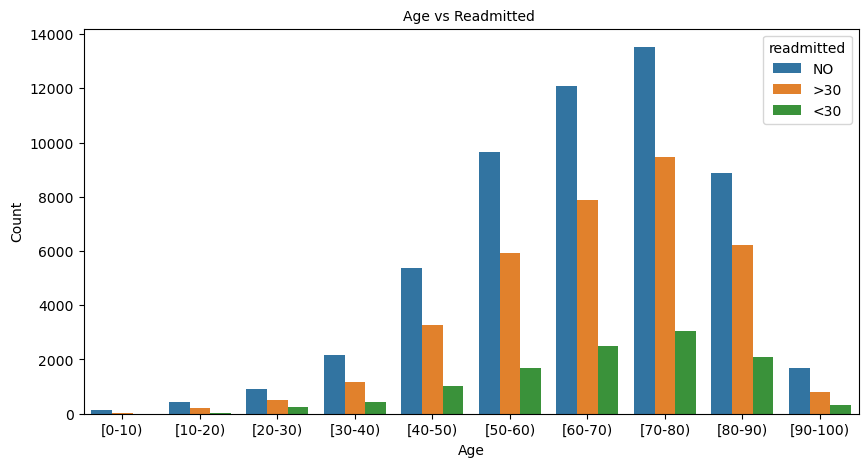

In [241]:
plt.figure(figsize=(10,5)) 
sns.countplot(x="age", hue="readmitted", data=dataset)
plt.xlabel('Age', size = 10)
plt.ylabel('Count', size = 10)
plt.title('Age vs Readmitted ', size = 10)
plt.show()


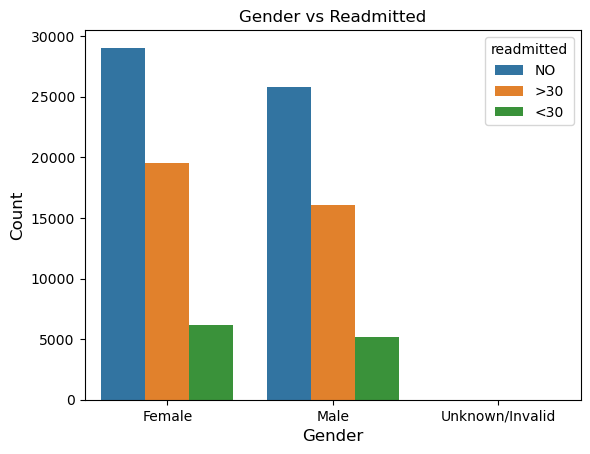

In [242]:
sns.countplot(x="gender", hue='readmitted', data=dataset)
plt.xlabel('Gender', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Gender vs Readmitted', size = 12)
plt.show()

In [243]:
dataset['time_in_hospital'].mean()

4.395986871843248

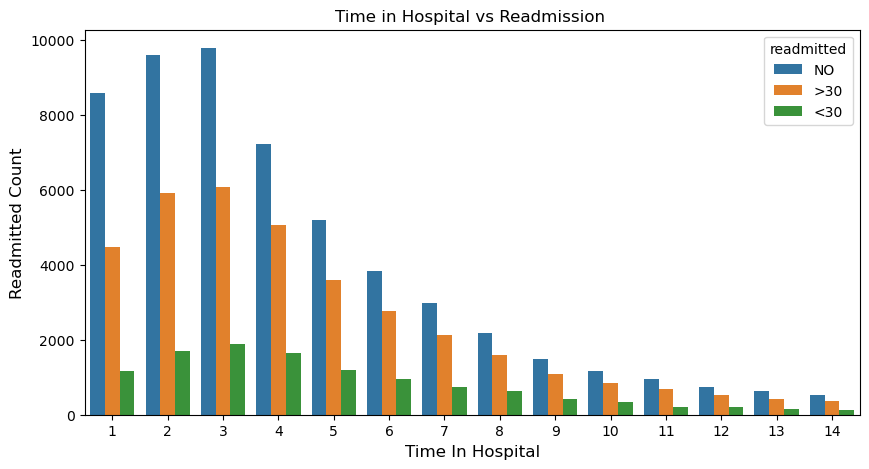

In [244]:
plt.figure(figsize=(10,5)) 
sns.countplot(x='time_in_hospital',  hue= 'readmitted',  data= dataset)
plt.xlabel('Time In Hospital', size = 12)
plt.ylabel('Readmitted Count', size = 12)
plt.title('Time in Hospital vs Readmission ', size = 12)
plt.show()

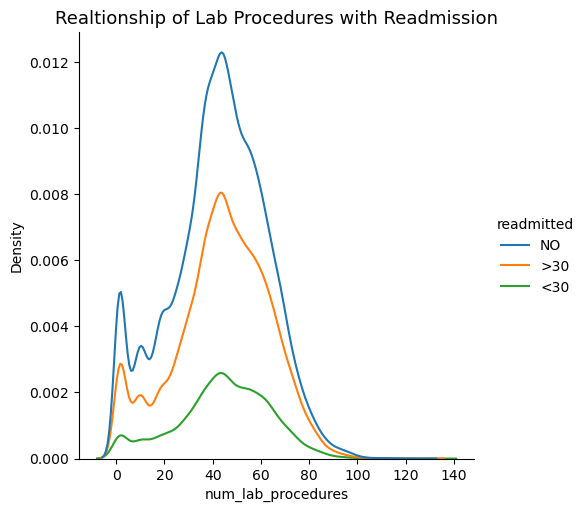

In [245]:
sns.displot(dataset, x="num_lab_procedures", hue= 'readmitted', kind="kde")
plt.title('Realtionship of Lab Procedures with Readmission', size = 13)
plt.show()

# WILL NOT CONSIDER LAB PROCEDURES AS IT HAS SIMILAR TRENDS AND WOULD CAUSE NO VARIENCE IN DATA FOR READMISSION ANALYSIS

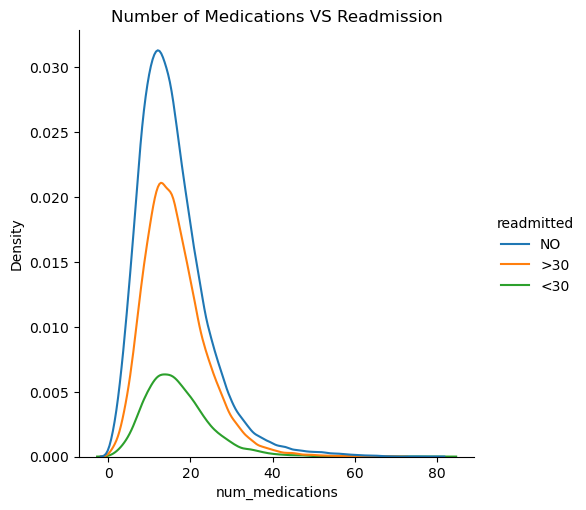

In [246]:
sns.displot(dataset, x="num_medications", hue= 'readmitted', kind="kde")
plt.title('Number of Medications VS Readmission')
plt.show()

# AGAIN DUE TO SIMILAR TRENDS THIS FEATURE WOULD ALSO HAVE NO VARIENCE 

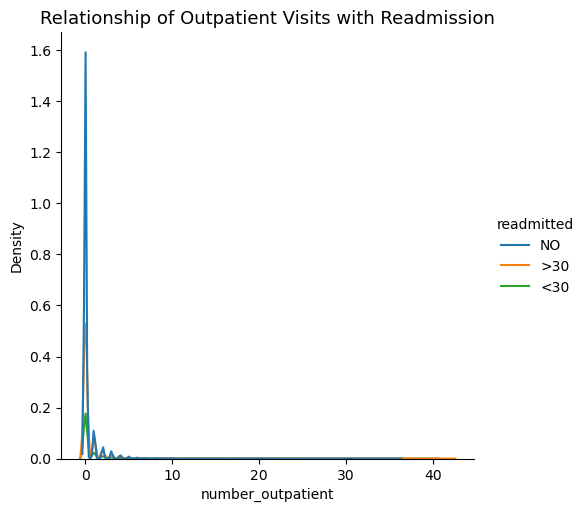

In [247]:
sns.displot(dataset, x="number_outpatient", hue= 'readmitted', kind ='kde')
plt.title('Relationship of Outpatient Visits with Readmission', size = 13)
plt.show()

#AS WE CAN SEE DATA IS HIGHLY SKEWED HERE

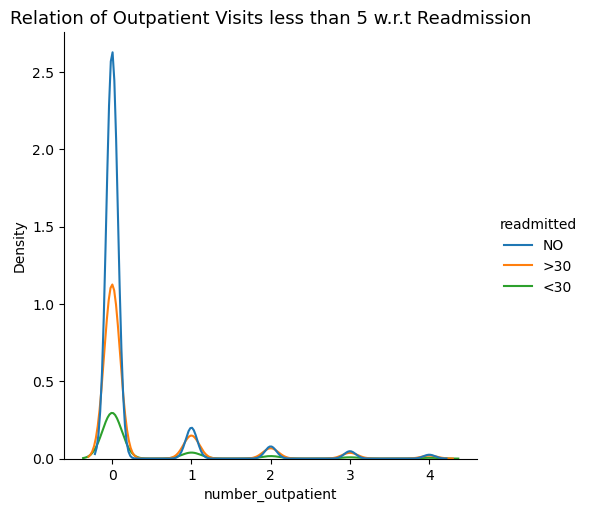

In [248]:
#SO LOOKING OUTPATIENT VISIT BELOW 5

sns.displot(dataset.loc[dataset['number_outpatient']<5], x="number_outpatient", hue= 'readmitted', kind ='kde')
plt.title('Relation of Outpatient Visits less than 5 w.r.t Readmission', size = 13)
plt.show()

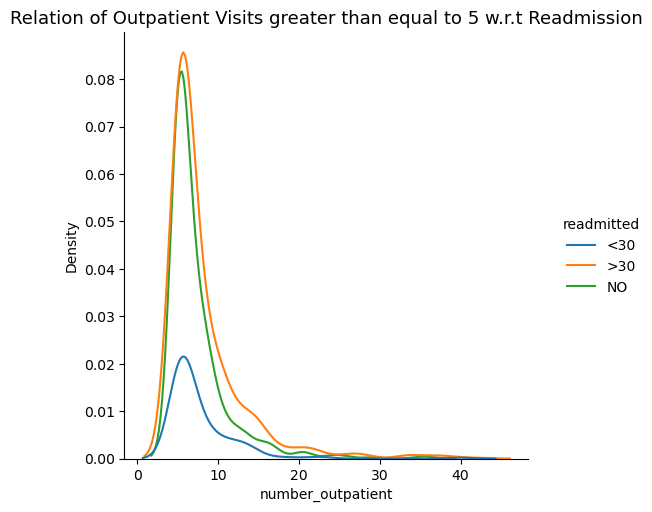

In [249]:
#SO LOOKING OUTPATIENT VISIT GREATER THAN EQUAL 5

sns.displot(dataset.loc[dataset['number_outpatient']>=5], x="number_outpatient", hue= 'readmitted', kind ='kde')
plt.title('Relation of Outpatient Visits greater than equal to 5 w.r.t Readmission', size = 13)
plt.show()

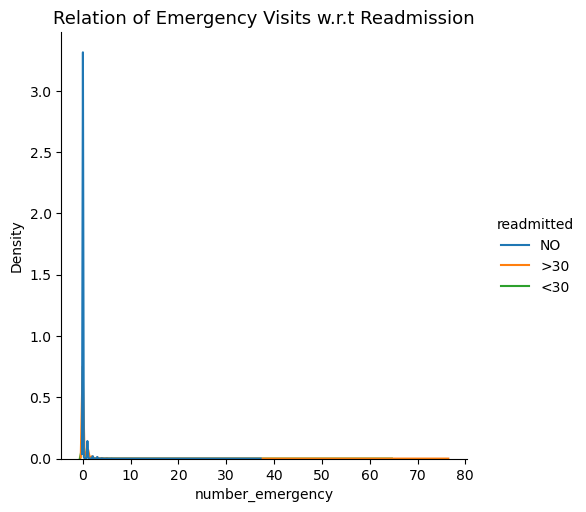

In [250]:
sns.displot(dataset, x="number_emergency", hue= 'readmitted', kind='kde')
plt.title('Relation of Emergency Visits w.r.t Readmission', size = 13)
plt.show()

## THIS DATA IS ALSO SKEWED SO CONSIDERING A SCALE OF 0-5 AND 5-10

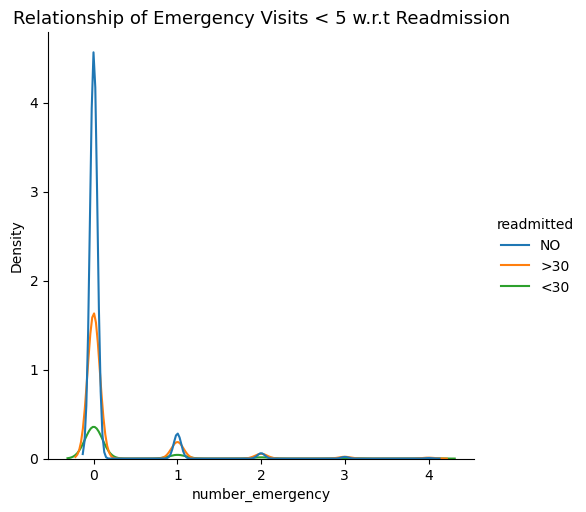

In [251]:
# EMERGENCY PATIENT <5

sns.displot(dataset.loc[dataset['number_emergency']<5], x="number_emergency", hue= 'readmitted', kind='kde')
plt.title('Relationship of Emergency Visits < 5 w.r.t Readmission', size = 13)
plt.show()

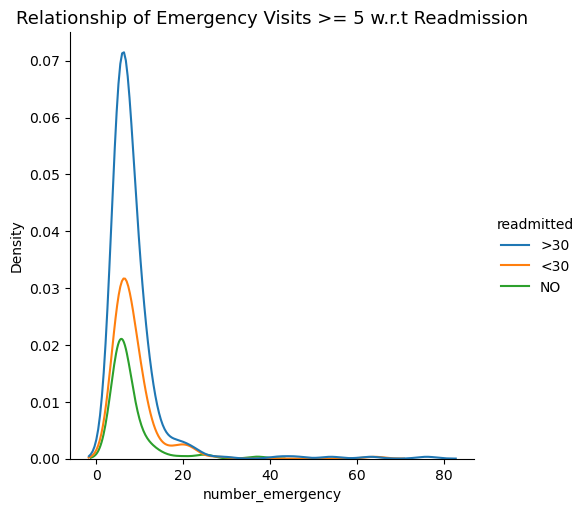

In [252]:
# EMERGENCY PATIENT >=5

sns.displot(dataset.loc[dataset['number_emergency']>=5], x="number_emergency", hue= 'readmitted', kind='kde')
plt.title('Relationship of Emergency Visits >= 5 w.r.t Readmission', size = 13)
plt.show()

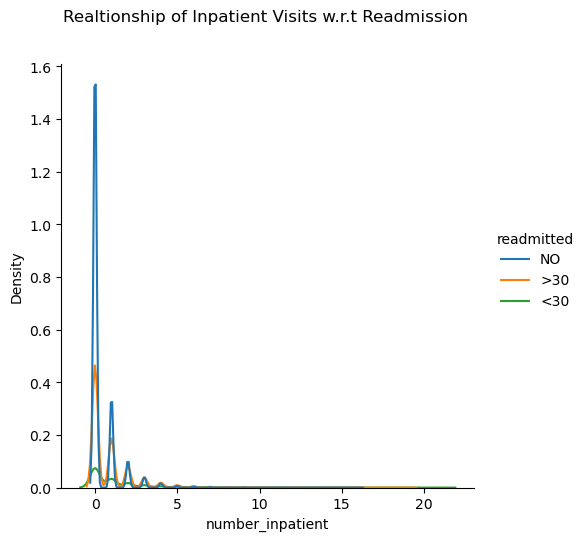

In [253]:
sns.displot(dataset, x="number_inpatient", hue= 'readmitted', kind='kde')
plt.title('Realtionship of Inpatient Visits w.r.t Readmission \n\n')
plt.show()

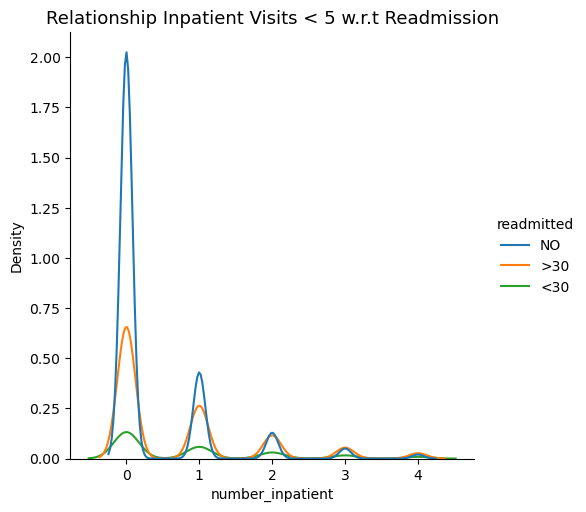

In [254]:
sns.displot(dataset.loc[dataset['number_inpatient']<5], x="number_inpatient", hue= 'readmitted', kind='kde')
plt.title('Relationship Inpatient Visits < 5 w.r.t Readmission', size = 13)
plt.show()

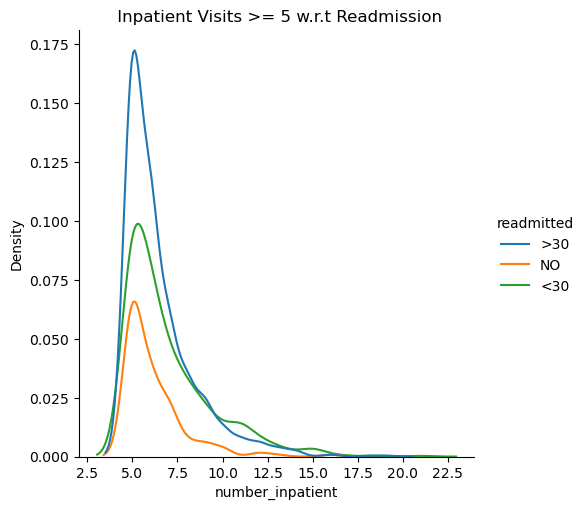

In [255]:
sns.displot(dataset.loc[dataset['number_inpatient']>=5], x="number_inpatient", hue= 'readmitted', kind='kde')
plt.title(' Inpatient Visits >= 5 w.r.t Readmission')
plt.show()

In [256]:
dataset[dataset['readmitted'] == 'Yes']['diag_1'].value_counts()

Series([], Name: diag_1, dtype: int64)

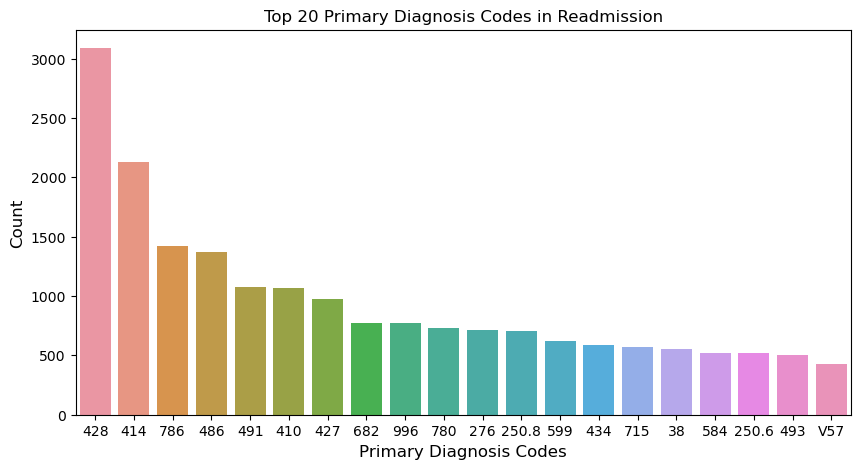

In [257]:
plt.figure(figsize=(10,5))
sns.barplot(x=dataset[dataset['readmitted'] == '>30']['diag_1'].value_counts().index[:20],
y=dataset[dataset['readmitted'] == '>30']['diag_1'].value_counts()[:20])
plt.xlabel('Primary Diagnosis Codes', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Top 20 Primary Diagnosis Codes in Readmission', size = 12)
plt.show()

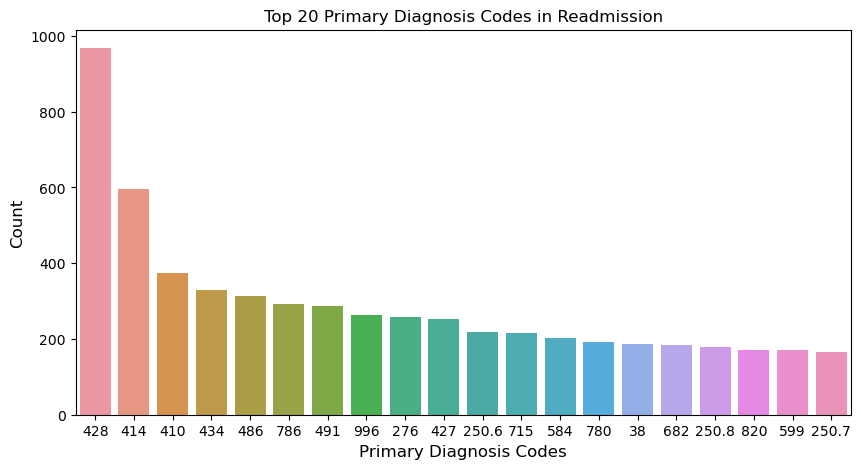

In [258]:
plt.figure(figsize=(10,5))
sns.barplot(x=dataset[dataset['readmitted'] == '<30']['diag_1'].value_counts().index[:20],
y=dataset[dataset['readmitted'] == '<30']['diag_1'].value_counts()[:20])
plt.xlabel('Primary Diagnosis Codes', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Top 20 Primary Diagnosis Codes in Readmission', size = 12)
plt.show()

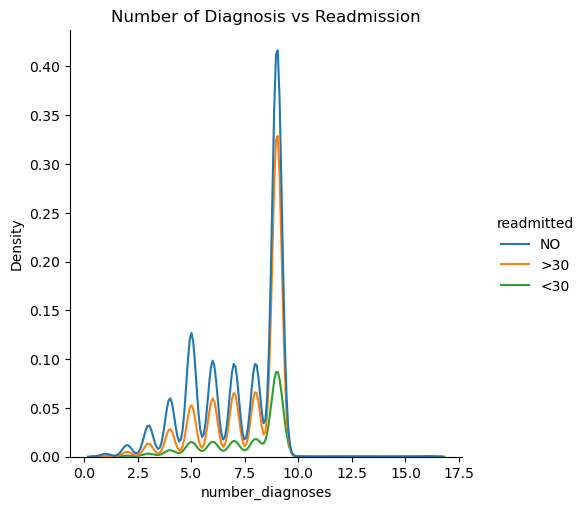

In [259]:
sns.displot(dataset, x="number_diagnoses", hue= 'readmitted', kind='kde')
plt.title('Number of Diagnosis vs Readmission')
plt.show()

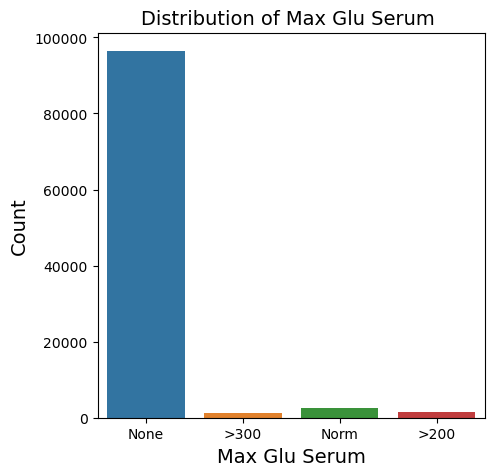

In [260]:
plt.figure(figsize=(5,5))
sns.countplot(x='max_glu_serum',   data= dataset)
plt.xlabel('Max Glu Serum', size = 14)
plt.ylabel('Count', size = 14)
plt.title('Distribution of Max Glu Serum ', size = 14)
plt.show()

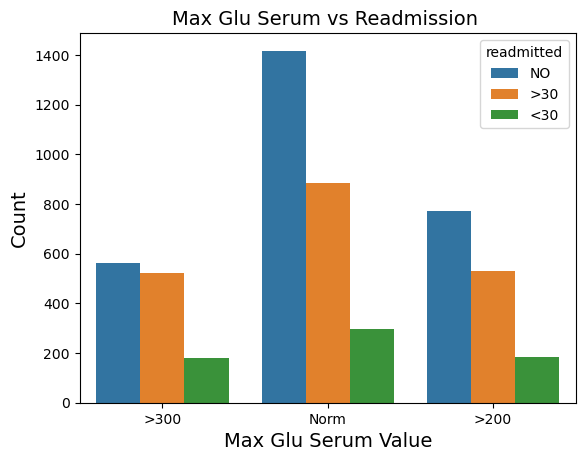

In [261]:
sns.countplot(x='max_glu_serum',  hue= 'readmitted', data= dataset[dataset['max_glu_serum']!='None'])
plt.xlabel('Max Glu Serum Value', size = 14)
plt.ylabel('Count', size = 14)
plt.title('Max Glu Serum vs Readmission ', size = 14)
plt.show()

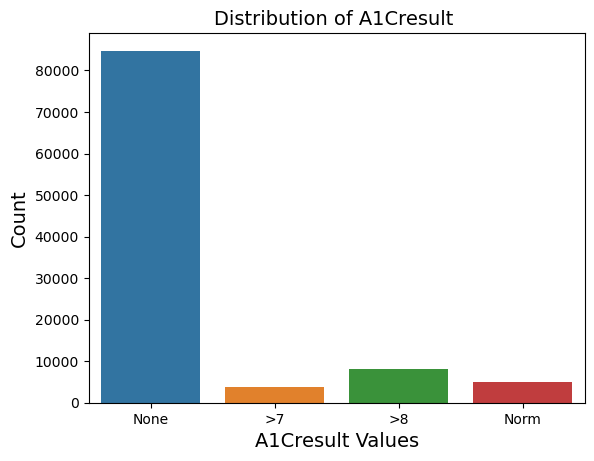

In [262]:
sns.countplot(x='A1Cresult', data= dataset)
plt.xlabel('A1Cresult Values', size = 14)
plt.ylabel('Count', size = 14)
plt.title('Distribution of A1Cresult ', size = 14)
plt.show()

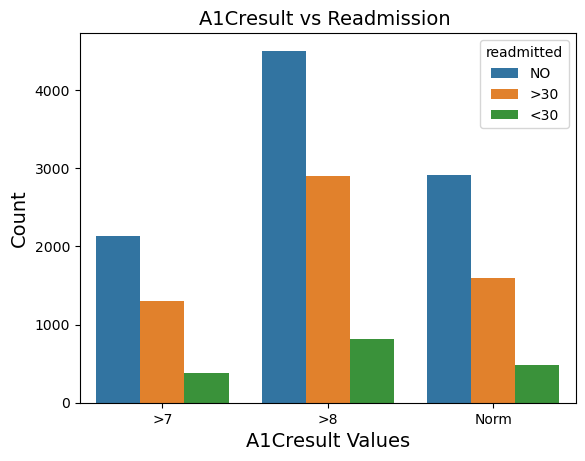

In [263]:
sns.countplot(x='A1Cresult', hue = 'readmitted', data=dataset[dataset['A1Cresult']!='None'])
plt.xlabel('A1Cresult Values', size = 14)
plt.ylabel('Count', size = 14)
plt.title('A1Cresult vs Readmission ', size = 14)
plt.show()

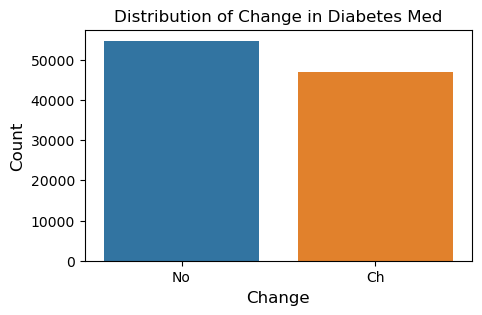

In [264]:
plt.figure(figsize=(5,3)) 
sns.barplot(x=dataset['change'].value_counts().index,   y=dataset['change'].value_counts())
plt.xlabel('Change', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Change in Diabetes Med', size = 12)
plt.show()

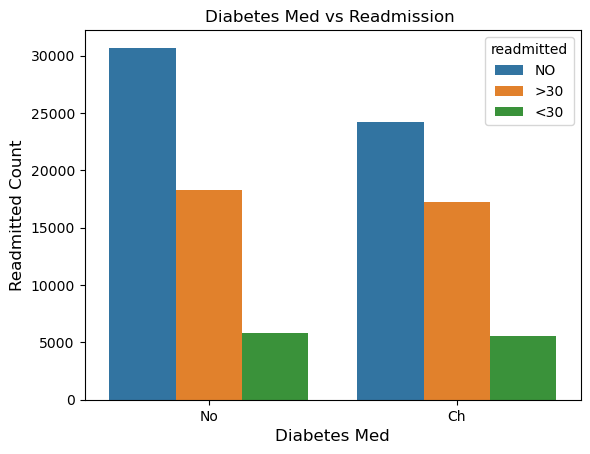

In [265]:
sns.countplot(x='change',  hue= 'readmitted',  data= dataset)
plt.xlabel('Diabetes Med', size = 12)
plt.ylabel('Readmitted Count', size = 12)
plt.title('Diabetes Med vs Readmission ', size = 12)
plt.show()

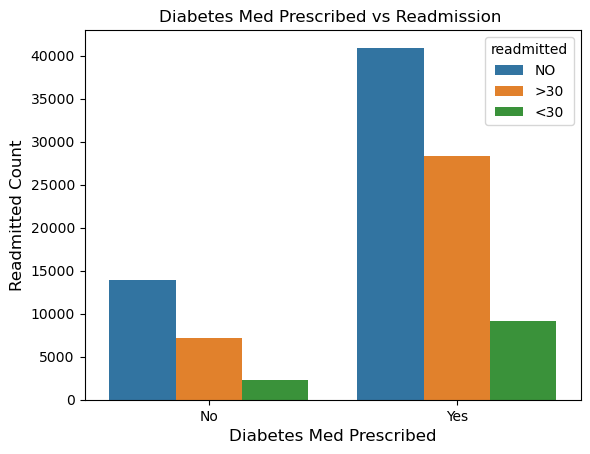

In [266]:
sns.countplot(x='diabetesMed',  hue= 'readmitted',  data= dataset)
plt.xlabel('Diabetes Med Prescribed', size = 12)
plt.ylabel('Readmitted Count', size = 12)
plt.title('Diabetes Med Prescribed vs Readmission ', size = 12)
plt.show()

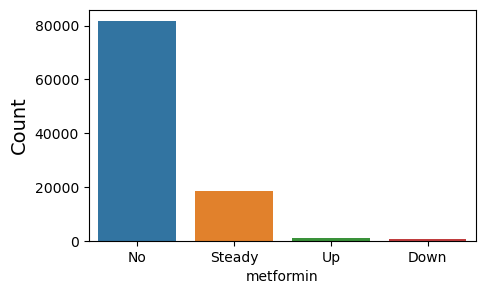

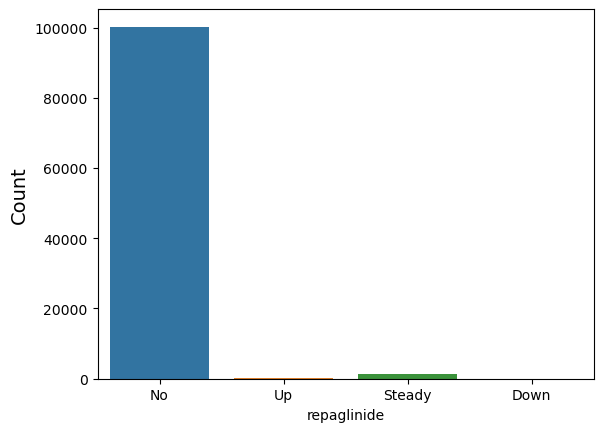

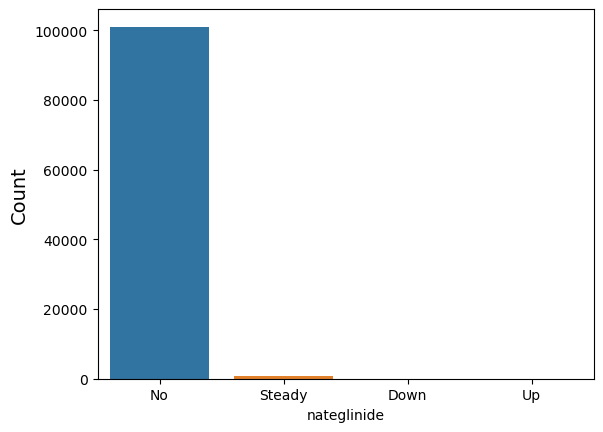

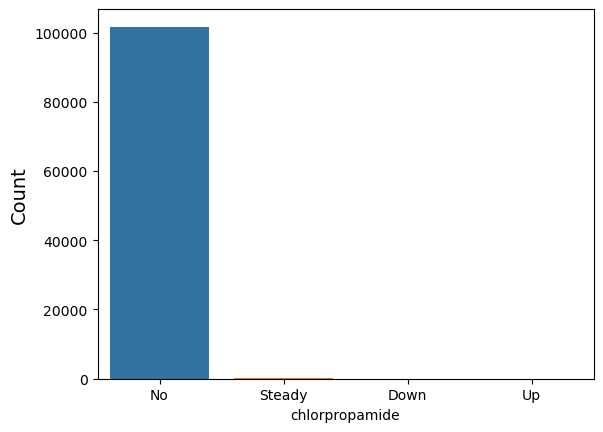

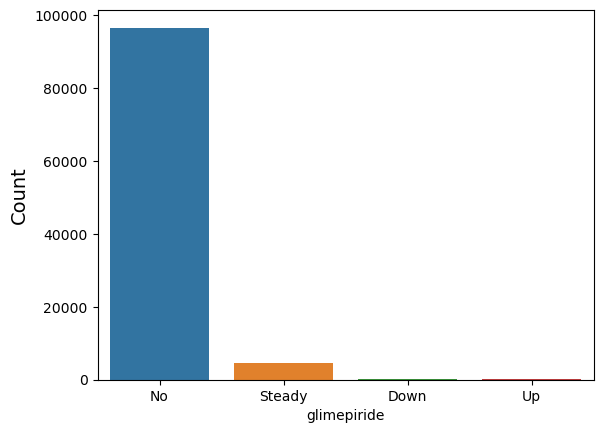

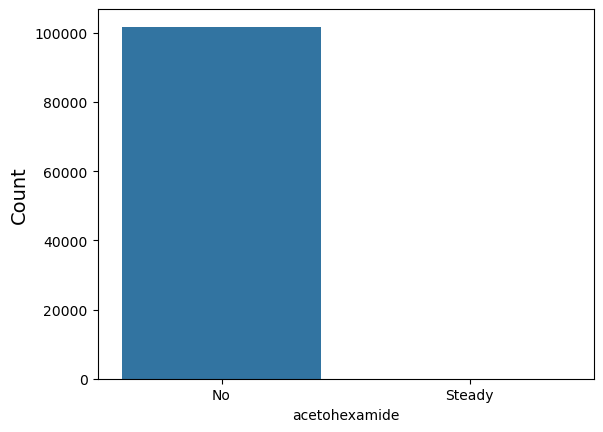

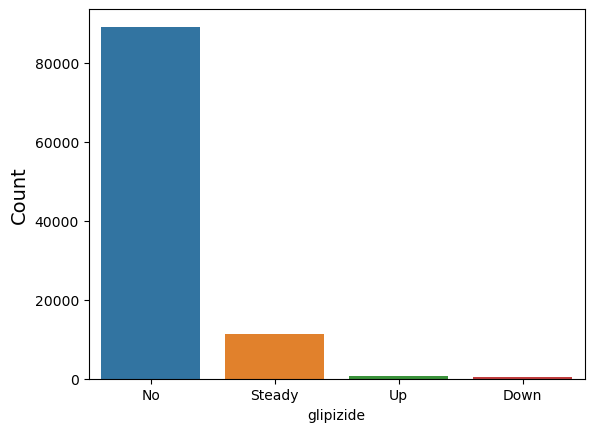

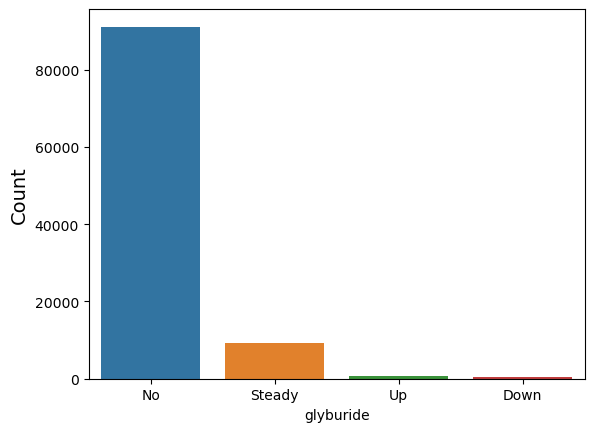

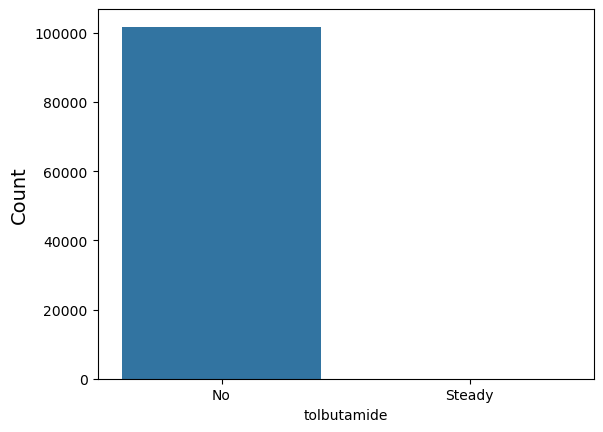

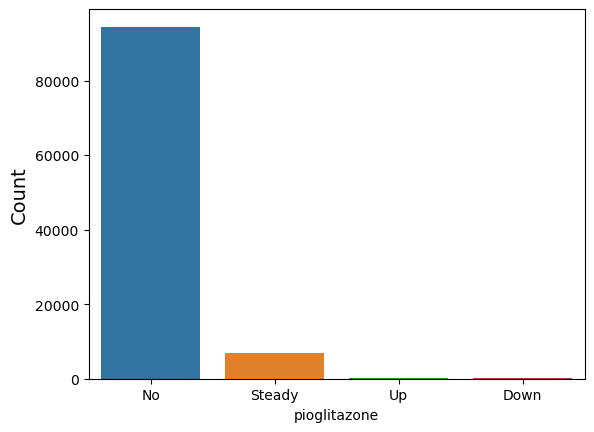

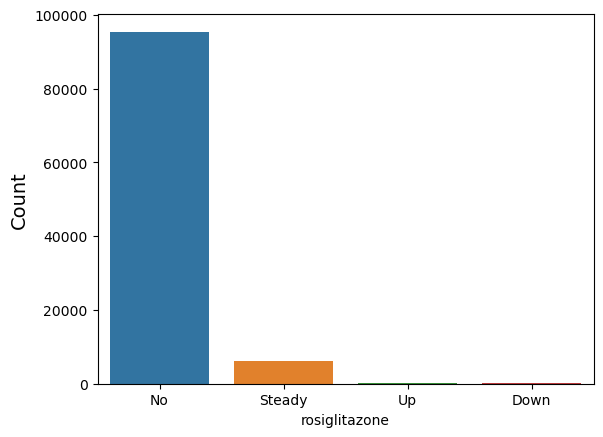

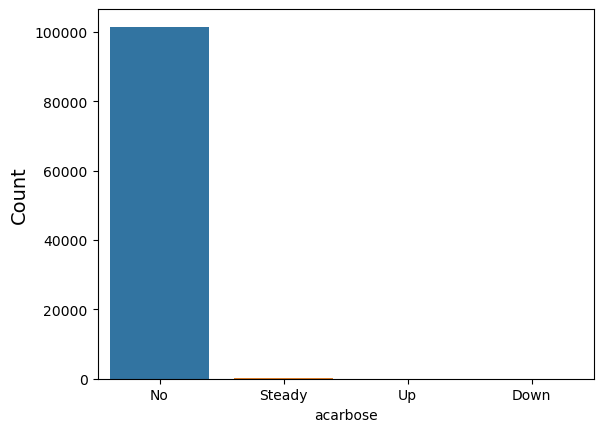

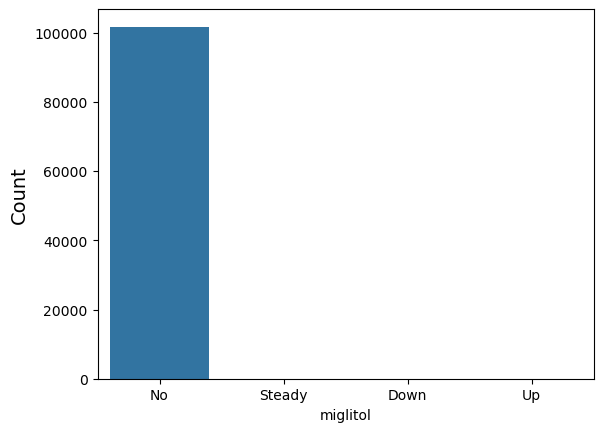

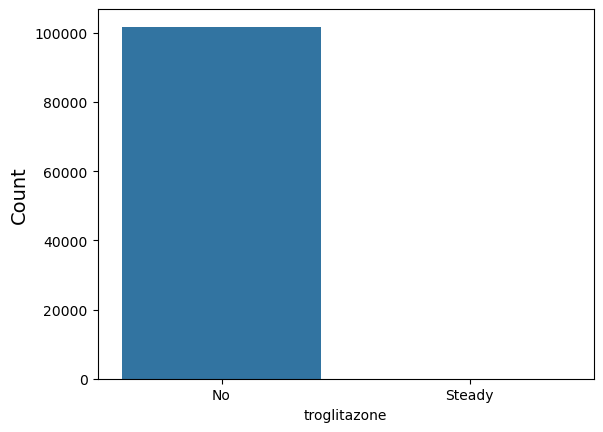

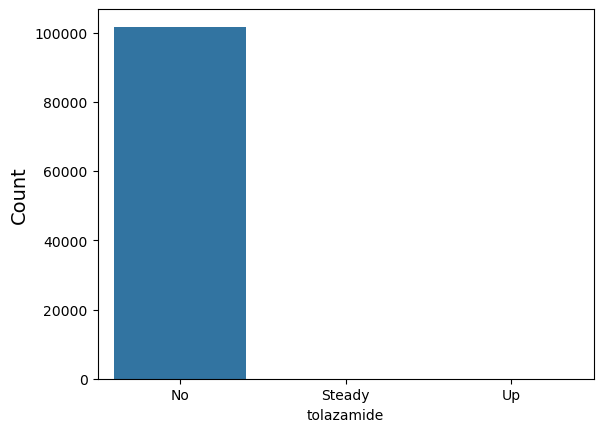

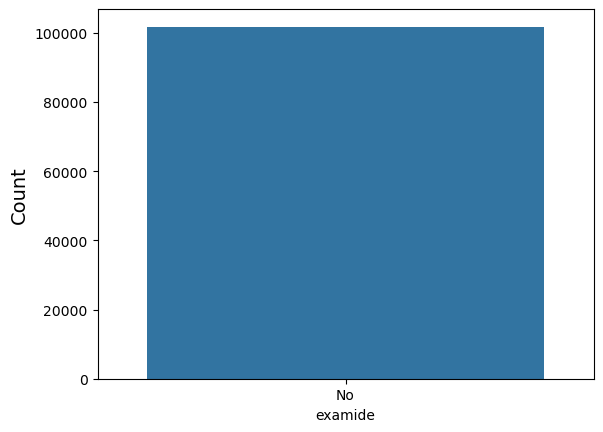

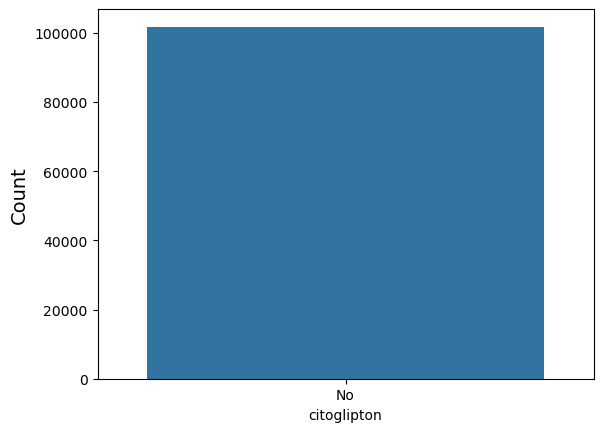

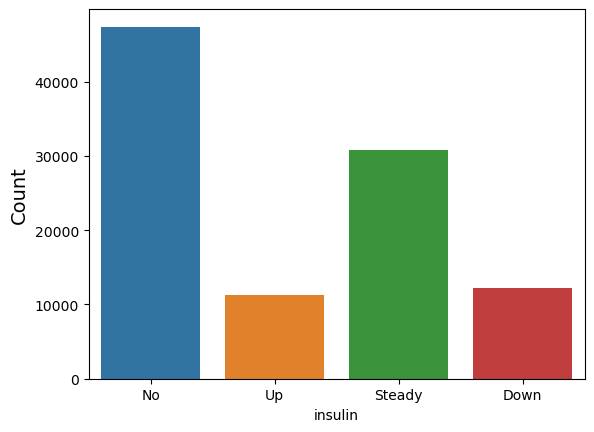

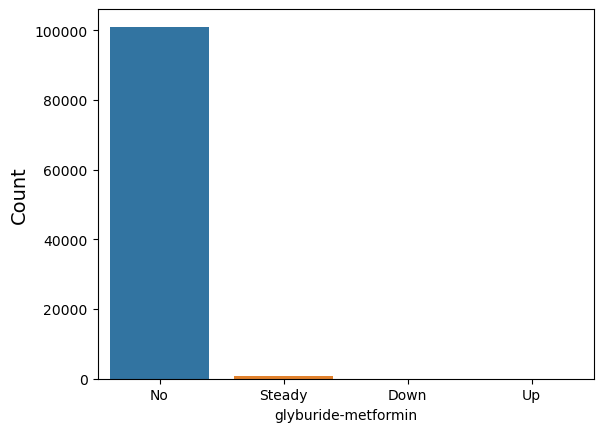

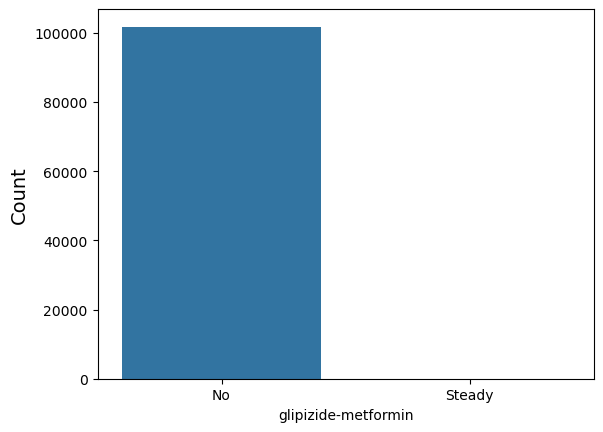

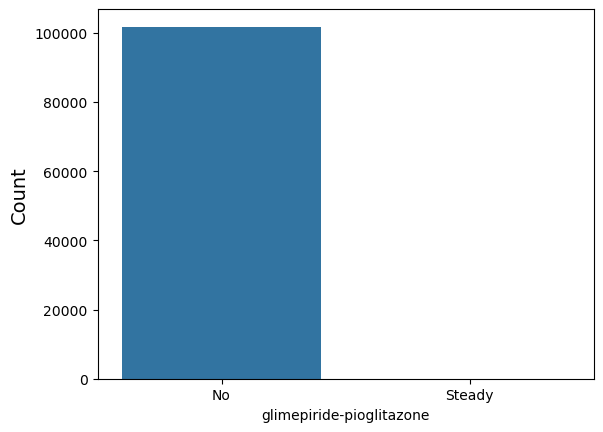

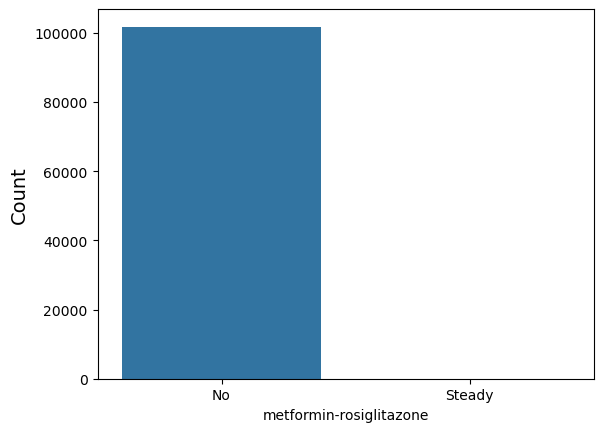

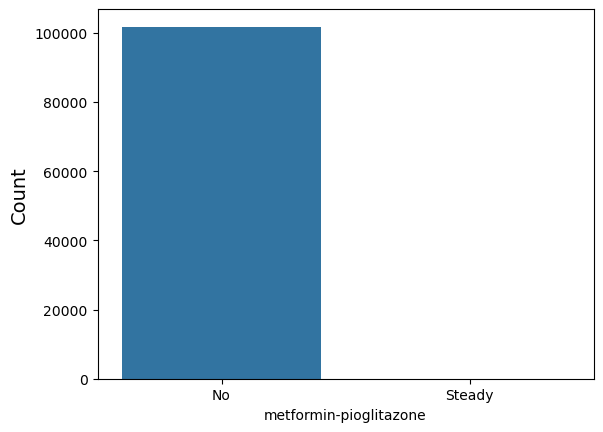

In [267]:
#NOW ANALYZING MEDICATION COLUMNS

plt.figure(figsize=(5,3)) 
for i in dataset.iloc[:, 21:44].columns:
    sns.countplot(x=i, data= dataset)
    plt.ylabel('Count', size = 14)
    plt.show()

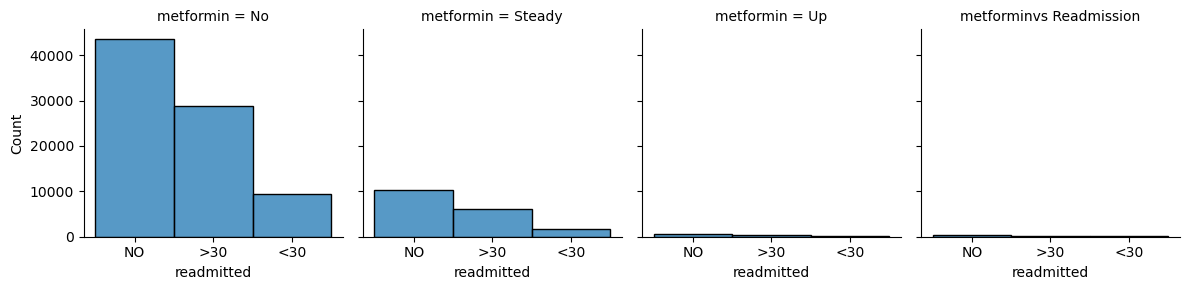

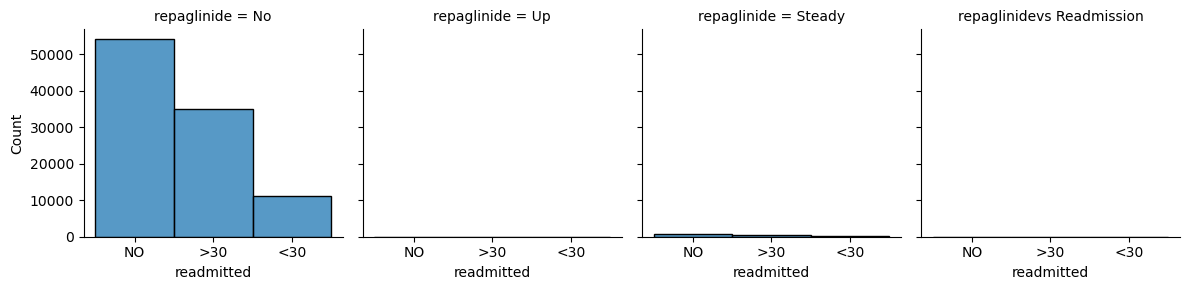

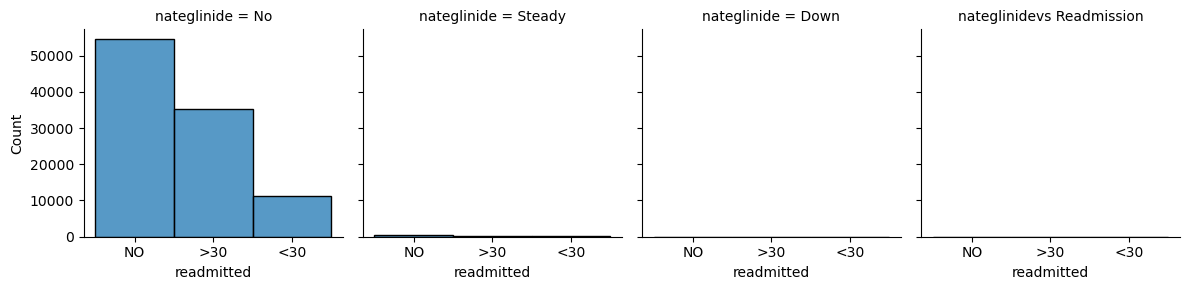

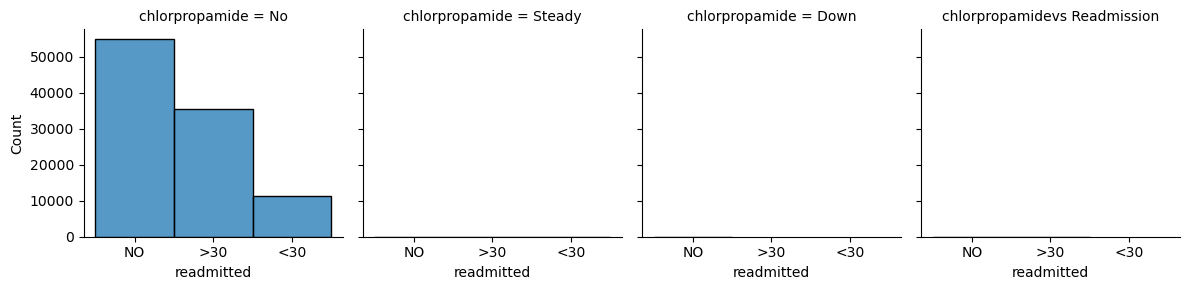

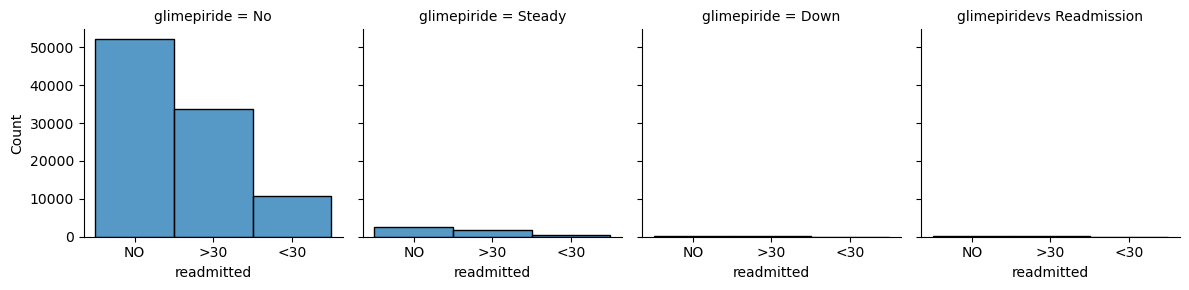

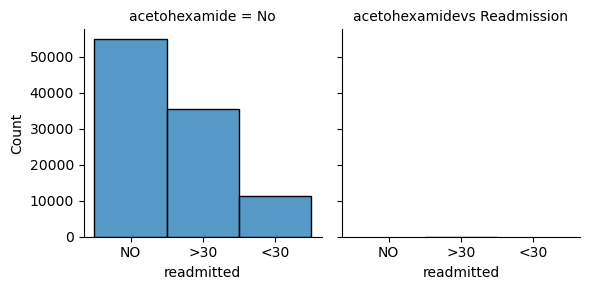

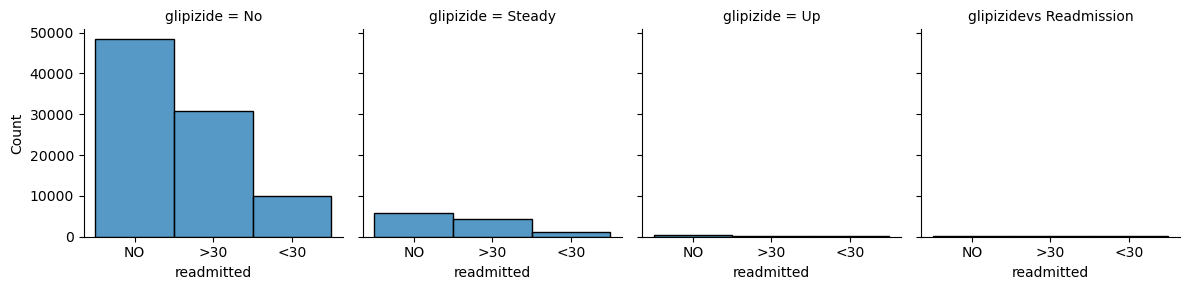

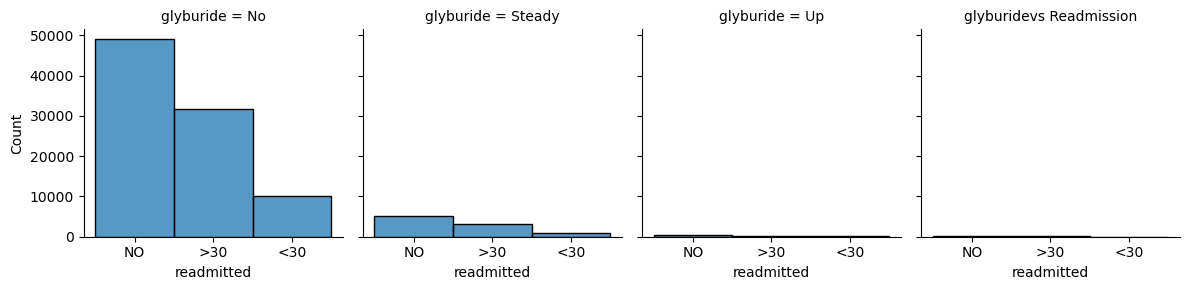

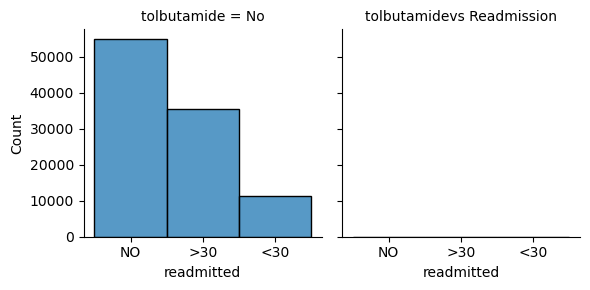

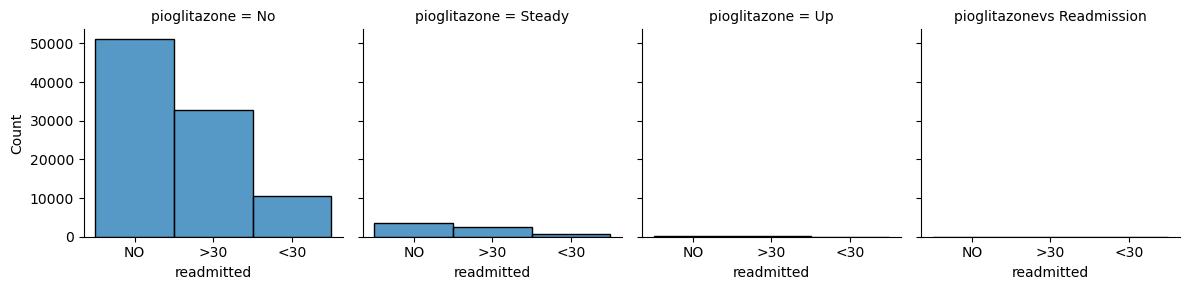

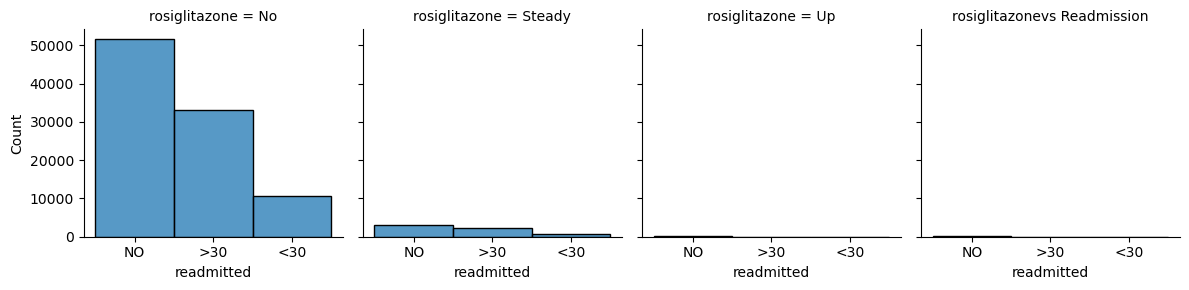

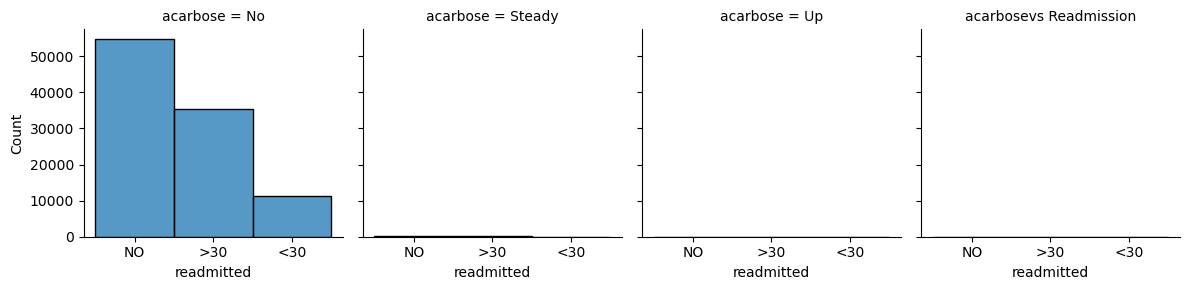

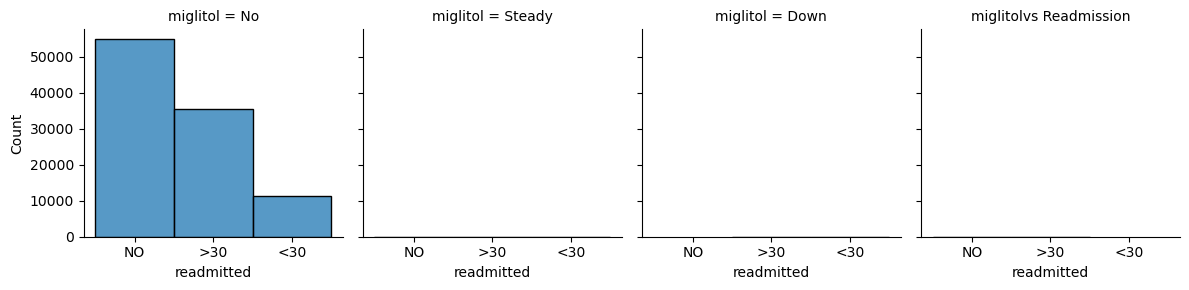

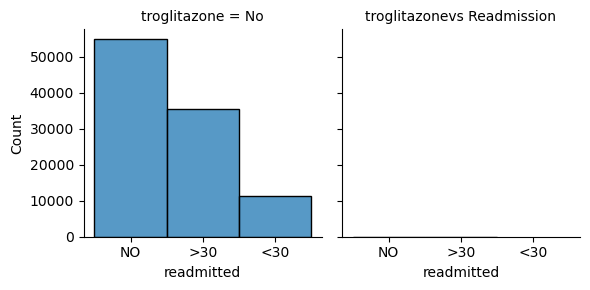

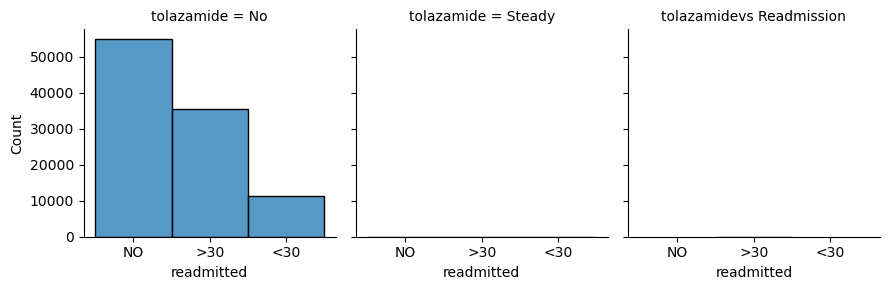

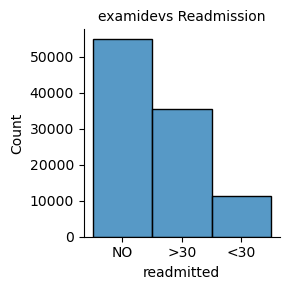

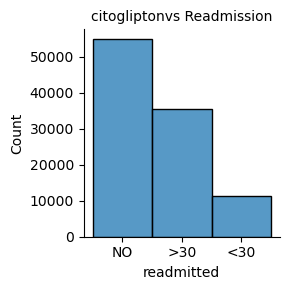

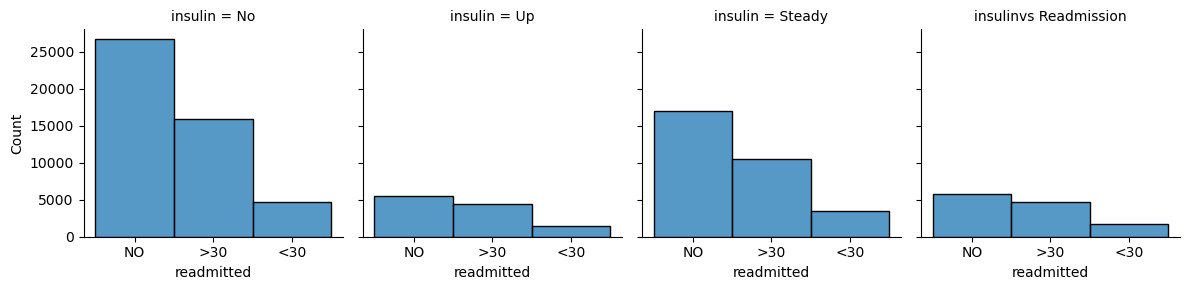

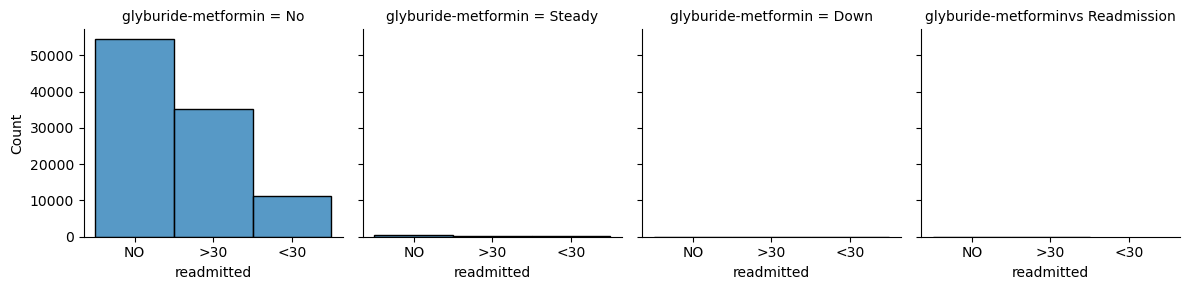

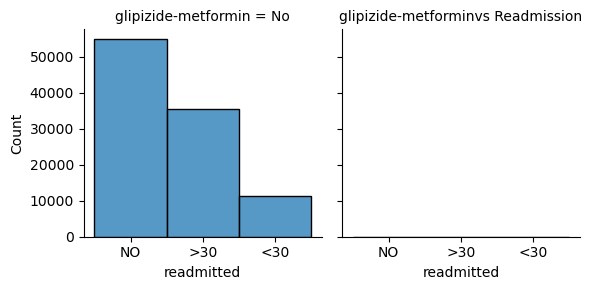

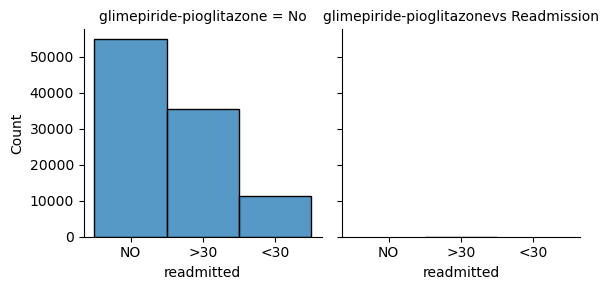

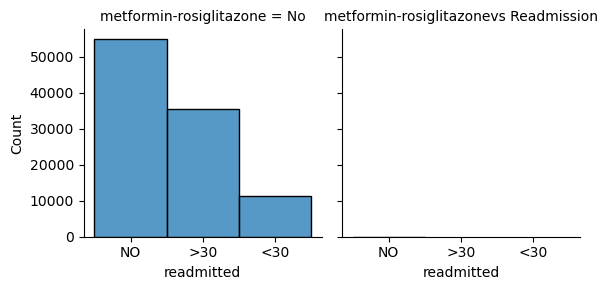

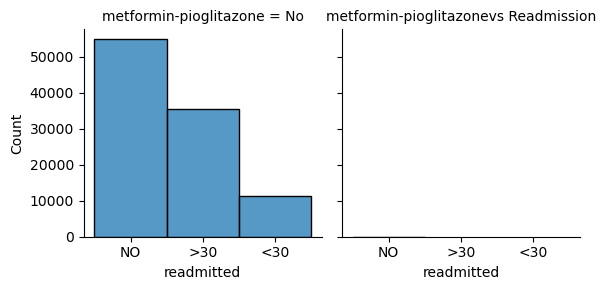

In [268]:
for columnName in dataset.iloc[:, 21:44].columns:
    g = sns.FacetGrid(dataset, col=columnName)
    g.map(sns.histplot, "readmitted")
    plt.title(str(columnName) + 'vs Readmission', size = 10)
    plt.show()

In [269]:
dataset.drop(columns = ['acetohexamide', 'tolbutamide', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
                   'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                   'metformin-pioglitazone'], inplace = True)

In [270]:
dataset.shape

(101766, 37)

In [271]:
dataset.dropna(subset=['diag_1', 'diag_2','diag_3'], inplace=True)

In [272]:
dataset.shape

(100244, 37)

In [273]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100244 entries, 1 to 101765
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              100244 non-null  int64 
 1   patient_nbr               100244 non-null  int64 
 2   race                      100244 non-null  object
 3   gender                    100244 non-null  object
 4   age                       100244 non-null  object
 5   admission_type_id         100244 non-null  int64 
 6   discharge_disposition_id  100244 non-null  int64 
 7   admission_source_id       100244 non-null  int64 
 8   time_in_hospital          100244 non-null  int64 
 9   num_lab_procedures        100244 non-null  int64 
 10  num_procedures            100244 non-null  int64 
 11  num_medications           100244 non-null  int64 
 12  number_outpatient         100244 non-null  int64 
 13  number_emergency          100244 non-null  int64 
 14  numb

In [274]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

In [275]:
dataset.readmitted.unique()

array(['>30', 'NO', '<30'], dtype=object)

In [276]:
categorical_features =['race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed'] 

for i in categorical_features:
    dataset[i] = le.fit_transform(dataset[i])

In [277]:
label = le.fit(dataset['readmitted'])

In [278]:
dataset['readmitted'] = label.transform(dataset['readmitted'])

In [279]:
dataset.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glyburide,pioglitazone,rosiglitazone,acarbose,miglitol,insulin,glyburide-metformin,change,diabetesMed,readmitted
1,149190,55629189,2,0,1,0,0,6,3,59,...,1,1,1,1,1,3,1,0,1,1
2,64410,86047875,0,0,2,0,0,6,2,11,...,1,1,1,1,1,1,1,1,1,2
3,500364,82442376,2,1,3,0,0,6,2,44,...,1,1,1,1,1,3,1,0,1,2
4,16680,42519267,2,1,4,0,0,6,1,51,...,1,1,1,1,1,2,1,0,1,2
5,35754,82637451,2,1,5,1,0,1,3,31,...,1,1,1,1,1,2,1,1,1,1


In [280]:
X=dataset.iloc[:,2:36].values
y=dataset.iloc[:,36].values

In [281]:
X

array([[2, 0, 1, ..., 1, 0, 1],
       [0, 0, 2, ..., 1, 1, 1],
       [2, 1, 3, ..., 1, 0, 1],
       ...,
       [2, 1, 7, ..., 1, 0, 1],
       [2, 0, 8, ..., 1, 0, 1],
       [2, 1, 7, ..., 1, 1, 0]], dtype=int64)

In [282]:
y

array([1, 2, 2, ..., 2, 2, 2])

In [308]:
X.shape

(100244, 34)

In [309]:
y.shape

(100244,)

# TRAIN TEST SPLIT

In [284]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [285]:
X_train.shape,X_test.shape

((80195, 34), (20049, 34))

# FEATURE SCALING

In [286]:
from  sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)   
X_test=sc.transform(X_test)       

# RANDOM FOREST

In [292]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 450, max_depth=9, random_state=43)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=450, random_state=43)

In [293]:
#Predicting test result

y_pred=rf.predict(X_test)

In [294]:
print("Accuracy Score:",accuracy_score(y_test, y_pred))

Accuracy Score: 0.5768367499625916


In [295]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2289
           1       0.51      0.29      0.37      7047
           2       0.59      0.89      0.71     10713

    accuracy                           0.58     20049
   macro avg       0.37      0.39      0.36     20049
weighted avg       0.50      0.58      0.51     20049



In [296]:
 confusion_matrix(y_test,y_pred)

array([[   0,  763, 1526],
       [   1, 2069, 4977],
       [   0, 1217, 9496]], dtype=int64)

# K NEAREST NEIGHBOUR

In [297]:
 from sklearn.neighbors import KNeighborsClassifier

In [298]:
knn= KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [299]:
y_pred= knn.predict(X_test)

In [300]:
print("Accuracy Score:",accuracy_score(y_test, y_pred))

Accuracy Score: 0.5148386453189685


In [301]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.22      0.07      0.10      2289
           1       0.41      0.40      0.41      7047
           2       0.59      0.68      0.63     10713

    accuracy                           0.51     20049
   macro avg       0.41      0.38      0.38     20049
weighted avg       0.48      0.51      0.49     20049



In [302]:
confusion_matrix(y_test,y_pred)

array([[ 149,  919, 1221],
       [ 278, 2850, 3919],
       [ 245, 3145, 7323]], dtype=int64)

# NAIVE BAYES

In [303]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [304]:
y_pred= classifier.predict(X_test)

In [305]:
print("Accuracy Score:",accuracy_score(y_test, y_pred))

Accuracy Score: 0.5260112723826624


In [306]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.23      0.21      0.22      2289
           1       0.45      0.05      0.10      7047
           2       0.57      0.90      0.70     10713

    accuracy                           0.53     20049
   macro avg       0.42      0.39      0.34     20049
weighted avg       0.49      0.53      0.43     20049



In [307]:
confusion_matrix(y_test,y_pred)

array([[ 488,  108, 1693],
       [ 969,  384, 5694],
       [ 679,  360, 9674]], dtype=int64)